# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [2]:
%load_ext autoreload
%autoreload 2

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/test.p'
validation_file= 'data/valid.p'
testing_file = 'data/train.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 12630
Number of testing examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
%load_ext autoreload
%autoreload 2
from modules.dataLoader import TrafficSignData, scaleForShow, tileForShow, warpImageShow

### This block is implemented in the modules/dataLoader.py, which encapsulate the data sets and image processing
### normalization and randomization


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
### to Initialize a "TrafficSignData" object, we need a dict of parameters as below

augment = {
        'rotate': 15, # +/- degrees
        'translate': 3, # +/- pixels
        'scale': 0.12, # 1.0 +/- ratio
        'Gaussian_blur': 1.25, # Gaussian blur kernel
        'Gaussian_speckle' : 0.02, # +/- pepper and salt noise
        'warpFreq': 0.75 # warp the image at 50% of the time
        }

params = {
        'BATCH_SIZE' : 512,
        'augment': augment    
}


In [8]:
data = TrafficSignData(params)
params['imsize']

image is processed
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
num of Training patterns [180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


(32, 32, 3)

Text(0.5, 1.0, 'Trainig samples before processing')

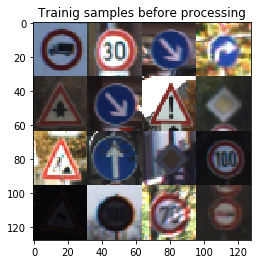

In [9]:
### each image from the train.p/test.p/valid.p is process by "TrafficSignData.processImage", which normalizes "lighting"
### as shown in the follwing two blocks

import matplotlib.pyplot as plt

samples = X_train[:16]
plt.imshow(tileForShow(samples))
plt.title('Trainig samples before processing')

image is processed


Text(0.5, 1.0, 'Training samples after lighting channle equalization')

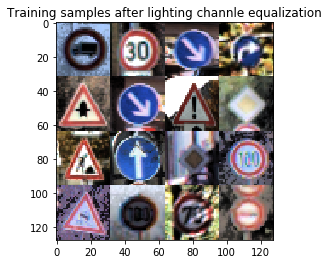

In [10]:
samples_processed, _, _ = data.processImage(np.array(samples))
plt.imshow(scaleForShow(tileForShow(samples_processed.tolist())))
plt.title('Trainig samples before processing')
plt.title('Training samples after lighting channle equalization')

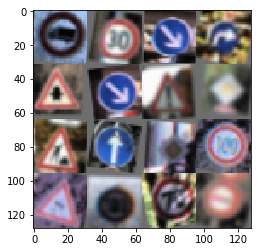

In [11]:
## Training samples are augmented through "TrafficSignData.warpImage", which adds 5 perturbation models
## to the training set.  Please see README.md and the dataLoader.py for details.

samples_warped = data.warpImage(samples_processed)
plt.imshow(scaleForShow(tileForShow(samples_warped)))


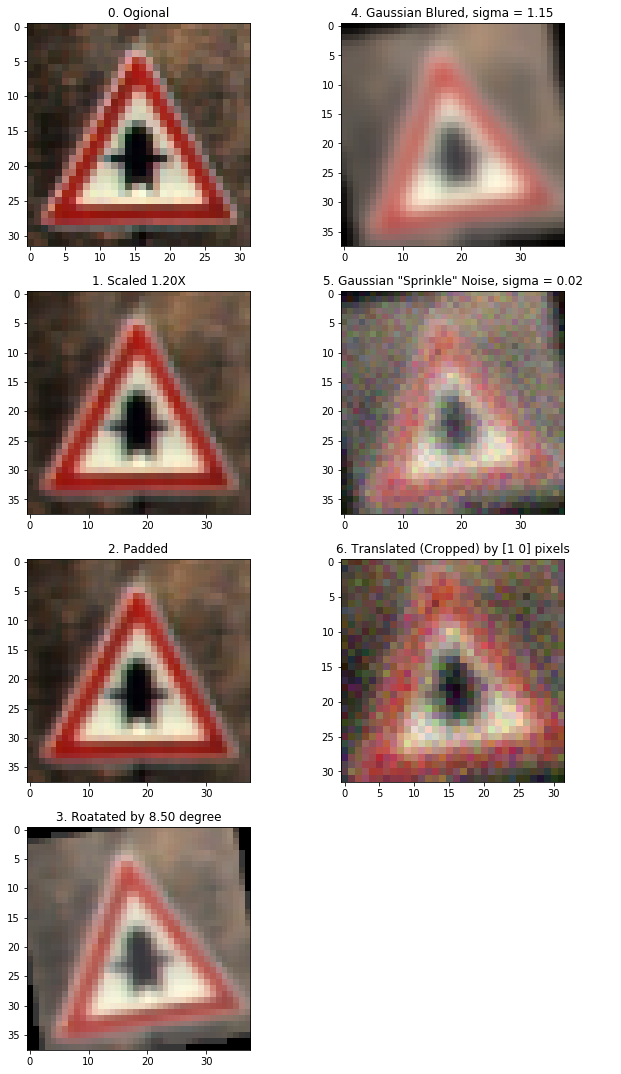

In [12]:
# A closer look at the data augmentation

warpImageShow(samples[4], augment)

In [13]:
### Image normalization is done by "TrafficSignData.normalizeImage", as the intentities of the training set
### are now belonged to N(0,1)

print(np.mean(data.x_train))
print(np.std(data.x_train))


-6.432917021225046e-16
0.9999999999999988


In [14]:
### Assuming without "a priori" on Validation and testing data, all inputs are normalized by the training set parameters,
### i.e., mean and standard deviation

### as shown below, the test/validation sets are showing similar statistical characteristics after normalization

print(np.mean(data.x_valid))
print(np.std(data.x_valid))
      
print(np.mean(data.x_test))
print(np.std(data.x_test))

-0.0003195262163464106
1.0056443022425041
-0.0014236594880388592
1.0126796419463406


### Model Architecture

In [15]:
### LeNet-5 model, implemented in modules/Lenet.py, is used for this project.
### Please refer to the python file for details. Below is a snapshot of the model.

In [16]:
### To initilize the network, a parameter dict is needed for the class constructor
Pool = {
       'ksize': [1, 2, 2, 1],
       'strides': [1, 2, 2, 1]        
        }
C1 = {
       'ksize' : [5, 5],
       'n': 64,
       'strides': [1, 1, 1, 1],
       'pool': Pool
       }

C2 = {
       'ksize' : [5, 5],
       'n': 128,      
       'strides': [1, 1, 1, 1],
       'pool': Pool
       }

LeNet_params = {
        # Arguments used for tf.truncated_normal, randomly defines variables 
        # for the weights and biases for each layer
        'mu' : 0,
        'sigma' :  0.1,
        'c1': C1, 
        'c2': C2,
        'nFC1' : 512,
        'nFC2' : 256,
        'lr' : 0.001,
        'validate_every_n_batch': 16,
        'EPOCHS' : 128,
        'param_keep_prob': 0.5,
        } 

In [17]:
## This params is combined with the parasm from dataLoader

params.update(LeNet_params)
for key in params.keys():
    print(key,params[key])

BATCH_SIZE 512
augment {'rotate': 15, 'translate': 3, 'scale': 0.12, 'Gaussian_blur': 1.25, 'Gaussian_speckle': 0.02, 'warpFreq': 0.75}
nCls 43
imsize (32, 32, 3)
mu 0
sigma 0.1
c1 {'ksize': [5, 5], 'n': 64, 'strides': [1, 1, 1, 1], 'pool': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1]}}
c2 {'ksize': [5, 5], 'n': 128, 'strides': [1, 1, 1, 1], 'pool': {'ksize': [1, 2, 2, 1], 'strides': [1, 2, 2, 1]}}
nFC1 512
nFC2 256
lr 0.001
validate_every_n_batch 16
EPOCHS 128
param_keep_prob 0.5


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
### create a LeNet by the parameters
from modules.LeNet import LeNet
model = LeNet(params)

In [20]:
### Below shows a training session aborted after 128 epochs
model.train(data, resume = False) # "resume = True" will restore the previous checkpoint before training

Ep#0-0 validation Rate =   1.88% best @ #0 =   1.88%
Ep#0-16 validation Rate =   3.45% best @ #0 =   3.45%
Ep#0-32 validation Rate =   3.67% best @ #0 =   3.67%
Ep#0-48 validation Rate =   3.47% best @ #0 =   3.67%
Ep#0-64 validation Rate =   3.65% best @ #0 =   3.67%
Ep#1-0 validation Rate =   3.85% best @ #1 =   3.85%
Ep#1-16 validation Rate =   4.01% best @ #1 =   4.01%
Ep#1-32 validation Rate =   5.31% best @ #1 =   5.31%
Ep#1-48 validation Rate =   5.22% best @ #1 =   5.31%
Ep#1-64 validation Rate =   7.32% best @ #1 =   7.32%
Ep#2-0 validation Rate =   7.28% best @ #1 =   7.32%
Ep#2-16 validation Rate =   9.61% best @ #2 =   9.61%
Ep#2-32 validation Rate =  13.99% best @ #2 =  13.99%
Ep#2-48 validation Rate =  15.90% best @ #2 =  15.90%
Ep#2-64 validation Rate =  19.25% best @ #2 =  19.25%
Ep#3-0 validation Rate =  19.64% best @ #3 =  19.64%
Ep#3-16 validation Rate =  22.74% best @ #3 =  22.74%
Ep#3-32 validation Rate =  24.42% best @ #3 =  24.42%
Ep#3-48 validation Rate =  28.64

Ep#29-64 validation Rate =  93.81% best @ #29 =  95.01%
Ep#30-0 validation Rate =  94.35% best @ #29 =  95.01%
Ep#30-16 validation Rate =  95.24% best @ #30 =  95.24%
Ep#30-32 validation Rate =  94.56% best @ #30 =  95.24%
Ep#30-48 validation Rate =  95.53% best @ #30 =  95.53%
Ep#30-64 validation Rate =  95.69% best @ #30 =  95.69%
Ep#31-0 validation Rate =  95.53% best @ #30 =  95.69%
Ep#31-16 validation Rate =  95.24% best @ #30 =  95.69%
Ep#31-32 validation Rate =  95.65% best @ #30 =  95.69%
Ep#31-48 validation Rate =  95.08% best @ #30 =  95.69%
Ep#31-64 validation Rate =  95.06% best @ #30 =  95.69%
Ep#32-0 validation Rate =  95.22% best @ #30 =  95.69%
Ep#32-16 validation Rate =  95.99% best @ #32 =  95.99%
Ep#32-32 validation Rate =  95.92% best @ #32 =  95.99%
Ep#32-48 validation Rate =  95.42% best @ #32 =  95.99%
Ep#32-64 validation Rate =  95.60% best @ #32 =  95.99%
Ep#33-0 validation Rate =  95.71% best @ #32 =  95.99%
Ep#33-16 validation Rate =  94.63% best @ #32 =  95.

Ep#59-16 validation Rate =  97.19% best @ #55 =  98.30%
Ep#59-32 validation Rate =  97.73% best @ #55 =  98.30%
Ep#59-48 validation Rate =  97.96% best @ #55 =  98.30%
Ep#59-64 validation Rate =  98.19% best @ #55 =  98.30%
Ep#60-0 validation Rate =  98.14% best @ #55 =  98.30%
Ep#60-16 validation Rate =  97.98% best @ #55 =  98.30%
Ep#60-32 validation Rate =  98.39% best @ #60 =  98.39%
Ep#60-48 validation Rate =  97.60% best @ #60 =  98.39%
Ep#60-64 validation Rate =  98.23% best @ #60 =  98.39%
Ep#61-0 validation Rate =  97.89% best @ #60 =  98.39%
Ep#61-16 validation Rate =  98.39% best @ #61 =  98.39%
Ep#61-32 validation Rate =  97.87% best @ #61 =  98.39%
Ep#61-48 validation Rate =  97.94% best @ #61 =  98.39%
Ep#61-64 validation Rate =  97.48% best @ #61 =  98.39%
Ep#62-0 validation Rate =  97.62% best @ #61 =  98.39%
Ep#62-16 validation Rate =  98.07% best @ #61 =  98.39%
Ep#62-32 validation Rate =  98.37% best @ #61 =  98.39%
Ep#62-48 validation Rate =  98.00% best @ #61 =  98

Ep#88-48 validation Rate =  98.16% best @ #85 =  98.98%
Ep#88-64 validation Rate =  98.82% best @ #85 =  98.98%
Ep#89-0 validation Rate =  98.62% best @ #85 =  98.98%
Ep#89-16 validation Rate =  98.57% best @ #85 =  98.98%
Ep#89-32 validation Rate =  98.41% best @ #85 =  98.98%
Ep#89-48 validation Rate =  98.91% best @ #85 =  98.98%
Ep#89-64 validation Rate =  99.07% best @ #89 =  99.07%
Ep#90-0 validation Rate =  98.98% best @ #89 =  99.07%
Ep#90-16 validation Rate =  98.41% best @ #89 =  99.07%
Ep#90-32 validation Rate =  98.73% best @ #89 =  99.07%
Ep#90-48 validation Rate =  98.68% best @ #89 =  99.07%
Ep#90-64 validation Rate =  98.44% best @ #89 =  99.07%
Ep#91-0 validation Rate =  98.41% best @ #89 =  99.07%
Ep#91-16 validation Rate =  98.64% best @ #89 =  99.07%
Ep#91-32 validation Rate =  98.41% best @ #89 =  99.07%
Ep#91-48 validation Rate =  98.50% best @ #89 =  99.07%
Ep#91-64 validation Rate =  98.48% best @ #89 =  99.07%
Ep#92-0 validation Rate =  98.46% best @ #89 =  99.

Ep#117-64 validation Rate =  98.34% best @ #89 =  99.07%
Ep#118-0 validation Rate =  98.32% best @ #89 =  99.07%
Ep#118-16 validation Rate =  98.32% best @ #89 =  99.07%
Ep#118-32 validation Rate =  98.32% best @ #89 =  99.07%
Ep#118-48 validation Rate =  98.44% best @ #89 =  99.07%
Ep#118-64 validation Rate =  98.71% best @ #89 =  99.07%
Ep#119-0 validation Rate =  98.78% best @ #89 =  99.07%
Ep#119-16 validation Rate =  98.14% best @ #89 =  99.07%
Ep#119-32 validation Rate =  98.50% best @ #89 =  99.07%
Ep#119-48 validation Rate =  98.62% best @ #89 =  99.07%
Ep#119-64 validation Rate =  97.89% best @ #89 =  99.07%
Ep#120-0 validation Rate =  98.05% best @ #89 =  99.07%
Ep#120-16 validation Rate =  98.37% best @ #89 =  99.07%
Ep#120-32 validation Rate =  98.25% best @ #89 =  99.07%
Ep#120-48 validation Rate =  98.75% best @ #89 =  99.07%
Ep#120-64 validation Rate =  98.68% best @ #89 =  99.07%
Ep#121-0 validation Rate =  98.59% best @ #89 =  99.07%
Ep#121-16 validation Rate =  98.64%

In [21]:
# Testing accuracy
test_accu =  model.eval(data.x_test, data.y_test)
print('Testing set accuracy', test_accu)

INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.9652414917945862
Testing set accuracy 0.9652415


In [22]:
train_accu_cls = []
for lab in range(data.nCls):
    ii = data.y_train == lab
    train_accu_cls += [model.eval(data.x_train[ii], data.y_train[ii])]
print('Training set accuracy per class', train_accu_cls)

INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 1.0
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.984343409538269
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.9880596995353699
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.9841269850730896
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.9937853217124939
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.982424259185791
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 1.0
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.9922480583190918
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 0.9960317611694336
INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
Accuracy = 1.0
INFO:tensorflow:Restoring p

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

image is processed


Text(0.5, 1.0, 'Processed and normalized images from German Bicycle Law website')

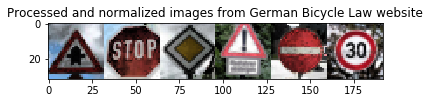

In [23]:
### images comes from http://bicyclegermany.com/german_bicycle_laws.html
### the images are rescaled then processed/normalized by the "TrafficSignData" class

from matplotlib import image as mpimg
from skimage import transform

Germ_signs = [ '100_1607_small.jpg', 'Stop_sign_small.jpg', 'Arterial_small1.jpg',
    'Radfahrer_Absteigen_small.jpg', 'Do-Not-Enter_small.jpg', 'speed_30.jpg']

imgs = []
for gs_i in Germ_signs:
    im0 = mpimg.imread('examples/' +gs_i)
    sc = 32.0/np.min(im0.shape[:2])
    im1 = transform.rescale(im0, sc, multichannel = True, anti_aliasing = True, mode = 'reflect')
    imgs += [im1[im1.shape[0]//2-16:im1.shape[0]//2+16, im1.shape[1]//2-16:im1.shape[1]//2+16, :]]
img_processed, _, _ = data.processImage(np.array(imgs))
plt.imshow(scaleForShow(np.hstack(img_processed.tolist()))) 
plt.title('Processed and normalized images from German Bicycle Law website')

### Predict the Sign Type for Each Image

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [25]:
yTop, pTop = model.predict(img_processed)
labels = data.mapIndex2TrafficSignName(np.array(yTop))
print(labels)

INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347
[['Beware of ice/snow' 'Right-of-way at the next intersection'
  'Road work' 'Children crossing' 'Dangerous curve to the right']
 ['Stop' 'Bicycles crossing' 'Road work' 'Bumpy road' 'General caution']
 ['Priority road' 'Keep right' 'Traffic signals'
  'No passing for vehicles over 3.5 metric tons'
  'End of no passing by vehicles over 3.5 metric tons']
 ['Bicycles crossing' 'No passing' 'Bumpy road' 'Slippery road'
  'No vehicles']
 ['No entry' 'Stop' 'Priority road'
  'Vehicles over 3.5 metric tons prohibited' 'Speed limit (20km/h)']
 ['Speed limit (30km/h)' 'Speed limit (50km/h)' 'Speed limit (100km/h)'
  'Speed limit (70km/h)' 'Speed limit (80km/h)']]


### Analyze Performance

In [37]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print('Accuracy_above = {}%'.format(100*4/6)) 

Accuracy_above = 66.66666666666667%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [28]:
print('|------------------  Top 5 candiates  ------------------|--probability--|')
for labi, pi in zip(labels, pTop):
    for ii in range(len(labi)):
        print('| {:50s} \t| {:5.4f} \t|'.format(labi[ii], pi[ii]))
    print('|-------------------------------------------------------|---------------|')

|------------------  Top 5 candiates  ------------------|--probability--|
| Beware of ice/snow                                 	| 0.6983 	|
| Right-of-way at the next intersection              	| 0.2993 	|
| Road work                                          	| 0.0023 	|
| Children crossing                                  	| 0.0001 	|
| Dangerous curve to the right                       	| 0.0000 	|
|-------------------------------------------------------|---------------|
| Stop                                               	| 0.6468 	|
| Bicycles crossing                                  	| 0.1714 	|
| Road work                                          	| 0.0487 	|
| Bumpy road                                         	| 0.0388 	|
| General caution                                    	| 0.0172 	|
|-------------------------------------------------------|---------------|
| Priority road                                      	| 1.0000 	|
| Keep right                                        

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Text(0.5, 1.0, 'input image for feature map visualization')

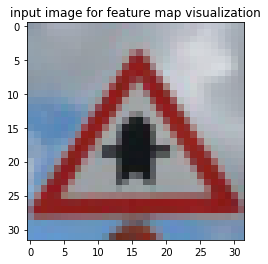

In [34]:
jj= 0
plt.figure()
plt.imshow(imgs[jj])
plt.title('input image for feature map visualization')

INFO:tensorflow:Restoring parameters from checkpoints/lenet5_1126085347


Text(0.5, 0.98, 'Feature Map of 100_1607_small.jpg')

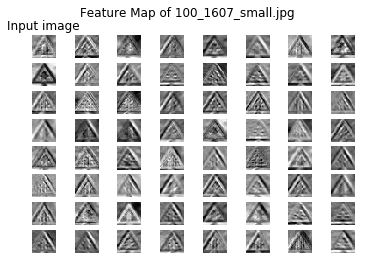

In [36]:
jj = 0
conv1, conv2 = model.dumpFeatureMap(np.array([img_processed[jj]]))
conv1 = scaleForShow(conv1)
fig, ax = plt.subplots(8,8)
ax = ax.flatten()
ax[0].imshow(imgs[jj])
ax[0].set_title('Input image')
for ii in range(0,64):
    ax[ii].imshow(conv1[:,:,ii], cmap = 'gray')
    ax[ii].axis('off')
fig.suptitle('Feature Map of ' + Germ_signs[jj])